## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.


In [27]:
from sklearn.datasets import make_classification

# we are using this to make a  dataset like we made in previous manually .

In [28]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)
# # n_redundant => bcoz. agar isko 0 k alawa kuch or likhe ge to ye unka linear combination lega.
# # linear dependent => jo kisi dusure par depend krta ho ya kisi or  se milke bna ho jaise ki x1 = [1,2,3] , x2 = [2,4,6] ,here x2 = 2X1

# n_clusters_per_class ek hi class ka cluster rhe (default)
# weights => ye probaliity set krne k lie hota hai for diff classes 
# for ex class0 , class1 => weights=[0.90] iska mtlb hai 90% for class 0 and 10 default for class 1 . Bydefault(50%)


In [37]:
# example to understand this
# x me direct n_feat-> auto fill val, same in target in d
c,d= make_classification(n_samples=10,n_redundant=0,n_features=2,weights=[0.8]) 
print(c,d)
edf1 = pd.DataFrame(c,columns=['t1','t2'])
edf2 = pd.DataFrame(d,columns=['tar'])
pd.concat([edf1,edf2],axis= 1)

[[-1.11423153  1.0806398 ]
 [-1.03263889 -2.46549715]
 [-0.56463053  1.29402003]
 [-1.09154378 -1.66765702]
 [-1.15396858  0.59837879]
 [-1.11663091 -0.33584739]
 [-1.66850146  0.23938436]
 [ 0.78629274 -1.68658502]
 [-1.14912294  1.80946436]
 [-1.15342258 -0.36489198]] [0 0 0 0 0 0 0 1 0 0]


,t1,t2,tar
0,-1.114232,1.080640,0
1,-1.032639,-2.465497,0
2,-0.564631,1.294020,0
3,-1.091544,-1.667657,0
4,-1.153969,0.598379,0
5,-1.116631,-0.335847,0
6,-1.668501,0.239384,0
7,0.786293,-1.686585,1
8,-1.149123,1.809464,0
9,-1.153423,-0.364892,0


In [39]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [40]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

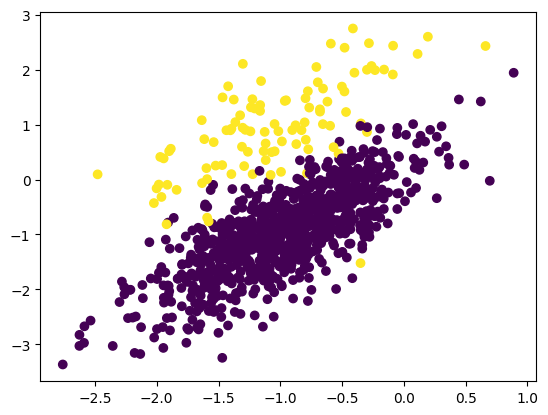

In [6]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
# c => color

In [41]:
!pip install imblearn

In [8]:
from imblearn.over_sampling import SMOTE

In [43]:
## transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [44]:
X.shape

(1800, 2)

In [46]:
y.shape

(1800,)

In [47]:
y==0

0        True
1        True
2        True
3       False
4        True
        ...  
1795    False
1796    False
1797    False
1798    False
1799    False
Name: target, Length: 1800, dtype: bool

In [49]:
y[y==0]

0      0
1      0
2      0
4      0
5      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: target, Length: 900, dtype: int64

In [48]:
len(y[y==0])

900

In [13]:
len(y[y==1])

900

In [50]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

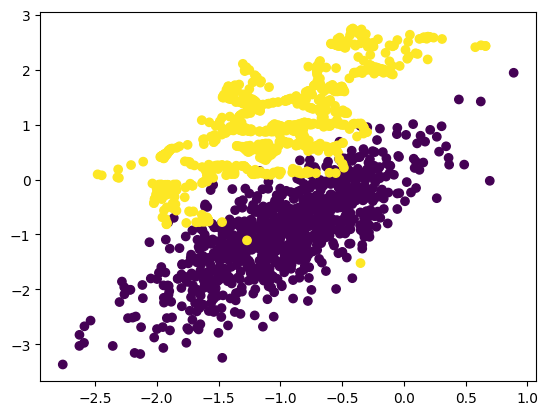

In [ ]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])
# here dots are connected which means these are interpolated